# Week 12 - Topic Modeling - Latent Dirichlet Allocation

------

## Part 1

Welcome to the last notebook of our class! :-) We hope you feel happy for arriving here...

Today, we'll work on a very useful text analysis technique called Topic Modeling. Particularly, we will use its most popular and powerful algorithm: Latent Dirichlet Allocation, or LDA

We start by the usual imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

LDA is in fact fully implemented in sklearn, so we can import it!

In order to use it, one needs to convert the documents into a Bag-of-Words representation. The object CountVectorizer does that, so let's import that too

In [2]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

Our dataset comes - suprise - from New York City. This time, we will focus on a multi-purpose indoor arena in the New York City borough of Brooklyn: the Barclay's center. 

We have collected a very long dataset for you. This dataset has about 800 events, including sports, music, circus, and so on. Notice that it's in tsv format ("tab" is used instead of commas, to separate fields). So we open it in a particular way

In [3]:
f=pd.read_csv("barclays_events_preprocessed.tsv", sep="\t", index_col=0) #index_col=0 is used because we can use the first column as the index 

In [4]:
f=f.dropna()   #There are some events without description. It doesn't make sense to use them now...

Take a careful look at this file. 

In [5]:
print('The shape of the dataframe is {}'.format(f.shape))
f.head()

The shape of the dataframe is (810, 5)


,date,start_time,title,url,description
0,2013-02-22,2013-02-22 19:30:00,Brooklyn Nets vs Houston Rockets,http://www.barclayscenter.com/events/detail/br...,jeremy james harden make their only appearance...
1,2015-10-09,2015-10-09 19:30:00,New York Islanders vs. Chicago Blackhawks,http://www.barclayscenter.com/events/detail/ne...,make dinner reservation today calling emailing...
4,2015-04-12,2015-04-12 20:00:00,Stevie Wonder,http://www.barclayscenter.com/events/detail/st...,legendary singer songwriter musician bringing ...
5,2013-02-13,2013-02-13 19:30:00,Brooklyn Nets vs Denver Nuggets,http://www.barclayscenter.com/events/detail/br...,during last season denver nugget have their te...
7,2014-11-25,2014-11-25 19:30:00,Progressive Legends Classic 2014,http://www.barclayscenter.com/events/detail/pr...,third consecutive season championship round le...


We need to create our Bag-of-Words representation (BoW). Here's how

In [6]:
vectorizer=CountVectorizer(stop_words='english') #create a CountVectorizer object. stop_words is a list a of words that are 
                                                 #irrelevant (for example, at, in, on, are, be, have...)

As many other objects in Sklearn, CountVectorizer is applied with the function fit_transform

In [7]:
descriptions_bow=vectorizer.fit_transform(f['description'])   #creates a BoW representation
description_vocabulary = vectorizer.get_feature_names()  #gets the words that correspond to each element of the BoW

This can be confusing. Check carefully the content of the variables you just created

In [8]:
description_vocabulary[:10]

['00aeef',
 '00am',
 '00pm',
 '0px',
 '0x',
 '10round',
 '10th',
 '12game',
 '12round',
 '12th']

It is finally time to run our LDA! 

Guess what, it's the usual process!

In [9]:
lda=LatentDirichletAllocation(n_components=10, learning_method='batch')
x=lda.fit_transform(descriptions_bow)

It's important to understand well both objects, x and lda. Check them carefully... for example, check what methods are available in the lda object. And check the dimensionality of x. What does it mean?

In [10]:
lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [11]:
x.shape # number of documents times the number of components. the result is the distribution of topics for each document

(810, 10)

In [12]:
all(np.sum(x,axis=1))==1

True

We copied the following code from an example in the Sklearn website. What does it do?

In [13]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

Try to use it... We will help you by giving an example

In [14]:
n_top_words=12
print_top_words(lda, description_vocabulary, n_top_words)

Topic #0: american express box tour office calling ticketmaster purchased com individual visiting click
Topic #1: album tour event wwe session meet artist new ha superstar band year
Topic #2: circus family world space earth adventure march quest journey online thrill visiting
Topic #3: group jay july 30pm music world ha 00pm new quidam festival bk
Topic #4: game basketball championship group event atlantic calling available purchase classic ncaa click
Topic #5: click follow disney ice present new magic individual make american memory express
Topic #6: adroll scr document http oldonload function com id window onload script getelementsbytagname
Topic #7: game net point world bull ha lopez varekai brook click chicago music
Topic #8: lirr schedule train make service reservation emailprotected emailing dinner today calling app
Topic #9: york special hotel code bridge marriott promotional corporate rate new check visit



Congrats! You implemented your first Topic Model!  :-)

Check carefully the topics above. What kind of event may be associated with each one?

----------------------

## Part 2 - Using your Topic Model

Before even using your topic model in regression, you can do some exploratory analysis

How about implementing an MDS model and visualizing it? Do you want to try?

In [15]:
from sklearn import manifold

In [16]:
mds = manifold.MDS(n_components=2, max_iter=100, n_init=1)
transformed_topics = mds.fit_transform(x)
color = np.argmax(x, axis=1) 

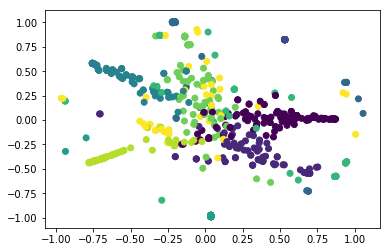

In [17]:
# I am not sure this is a correct visualization. There seems to be a pattern in the data but it is hard to asses what is the relation 
#  between the topics
plt.scatter(transformed_topics[:, 0], transformed_topics[:, 1], c=color);
plt.axis('tight');

----------------

## Part 3 - Find the right number of topics

Plot the elbow function to find the best choice for K

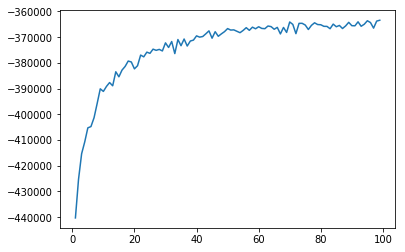

In [18]:
scores=[]
for k in range(1, 100):
    lda=LatentDirichletAllocation(n_components=k, learning_method='batch')
    lda.fit(descriptions_bow)
    scores.append(lda.score(descriptions_bow))
plt.plot(range(1,100), scores)

What is the best choice of K for you?

In [19]:
# It is hard to tell but if it I have to pick a single value I would pick the first peak, meaning somewhere between 10 and 15

--------


## Part 4 - Understanding distributions (optional)

It is common to find very abstract concepts, somewhat confusing, in a statistics or machine learning class. The best way for you to learn, is really to play with them as much as you can. For now, let's just focus on the Dirichlet distribution

It is available as numpy.random.dirichlet(alpha, size=None)

...so, try it! For example, obtain draws from this distribution using different values of alpha.

In [20]:
print(np.random.dirichlet([.2,.2, .2]))
print(np.random.dirichlet([.1,.1, .9]))
print(np.random.dirichlet([1,1, 1]))

[0.00592422 0.93394101 0.06013477]
[3.96556658e-08 8.75159095e-02 9.12484051e-01]
[0.31182477 0.60452476 0.08365048]


In [21]:
'''Function to plot points in a simplex'''

# Based on post from Thomas Boggs (http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/)

import matplotlib.tri as tri

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])

def plot_points(X):
    '''Plots a set of points in the simplex.

    Arguments:

        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.
    '''
    
    X = X.dot(_corners)  #This is what converts the original points onto the simplex (it projects on it, through dot product)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.triplot(_triangle, linewidth=1)

Whenever you can, try to visualize it. Remember what we did in the slides. Try to do the same thing!

**feel free to use the function below, to plot points from a dirichlet distribution, onto a 2D simplex**

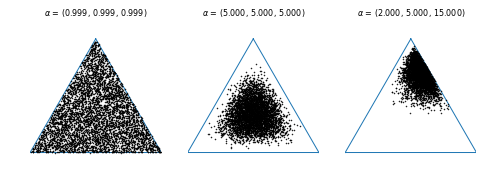

In [22]:
f = plt.figure(figsize=(8, 6))
alphas = [[0.999] * 3,
          [5] * 3,
          [2, 5, 15]]
for (i, alpha) in enumerate(alphas):
    plt.subplot(2, len(alphas), i + 1)
    dist = np.random.dirichlet(alpha, size=5000)
    title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
    plt.title(title, fontdict={'fontsize': 8})
    plot_points(dist)